# Likes Report
Jaclyn Bell </br>
9/21/2025

## Questions:
### Who or what is the source of your personal Instagram data? 
The sources of my personal instagram data comes mainly from liking or sharing posts. Other sources would be the things I have uploaded to the app such as photos, reels, and stories. My data also comes from sending messages or commenting on others posts. </br>
### Why was this data created and what purposes can the data serve? 
I think the data is used for a lot of reasons, for example in advertising, they can use my data to target me with ads that might spark my interset, and keep track of what I click on or buy. Or it could help them train AI algorithims so the app would suggest content to me that would increase my engagement in the app, sometimes keeping me scrolling for way too long. :) </br>
### In what ways may this data be reliable? 
The data that would be reliable would be your login information such as user name and password, or your personal phone number or email, used as sercurity for logging in or recovering your account. It could also be you behavior on the app such as the way you interact with it, through likes, and comments. </br>
### In what ways may this data be unreliable?
I think a lot of people lie in their personal information, such as names, or birthdays. Or they make burner accounts or accounts to impersonate others. And another thing that I do a lot if scroll mindlessly without actually reacting, even though I might really like what Im seeing, sometimes I just go so fast that I don't take that second to like or save the post. so this could have an effect on my data being collected. 

In [107]:
import json as js
import pandas as pd

from datetime import datetime

from scipy.stats import chisquare

import matplotlib.pyplot as plt

Opening and loading the json file from the likes folder

In [108]:
with open(r"C:\Users\jacki\Data in EMAT\DATA INSTAGRAM\your_instagram_activity\likes\liked_posts.json", "r", encoding="utf-8") as f:
    data = js.load(f)

In [109]:
df = pd.DataFrame(data['likes_media_likes'])

In [110]:
df.head(10)


,title,string_list_data
0,lvmandm9onprime,[{'href': 'https://www.instagram.com/reel/DNoM...
1,jenbutlersays,[{'href': 'https://www.instagram.com/reel/DNjl...
2,yoursupermindset,[{'href': 'https://www.instagram.com/reel/DNdZ...
3,boardgame_buzzz,[{'href': 'https://www.instagram.com/reel/DNs-...
4,jessicaevedesu,[{'href': 'https://www.instagram.com/reel/DNtS...
5,laura.henshaw,[{'href': 'https://www.instagram.com/reel/DK_q...
6,gangabala19,[{'href': 'https://www.instagram.com/reel/DNYV...
7,tokyo_thebear,[{'href': 'https://www.instagram.com/reel/DHyk...
8,zero.sleeps,[{'href': 'https://www.instagram.com/reel/DNtb...
9,fireandiceoutdoors,[{'href': 'https://www.instagram.com/reel/DNsY...


In [111]:
print(js.dumps(data["likes_media_likes"][0], indent=2))

{
  "title": "lvmandm9onprime",
  "string_list_data": [
    {
      "href": "https://www.instagram.com/reel/DNoMzVUI5tW/",
      "value": "\u00f0\u009f\u0091\u008d",
      "timestamp": 1756112472
    }
  ]
}


In [112]:
df["timestamp"] = df["string_list_data"].apply(lambda x: x[0]["timestamp"])

In [113]:
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

In [114]:
df.head(10)

,title,string_list_data,timestamp
0,lvmandm9onprime,[{'href': 'https://www.instagram.com/reel/DNoM...,2025-08-25 09:01:12
1,jenbutlersays,[{'href': 'https://www.instagram.com/reel/DNjl...,2025-08-25 02:34:52
2,yoursupermindset,[{'href': 'https://www.instagram.com/reel/DNdZ...,2025-08-25 02:29:31
3,boardgame_buzzz,[{'href': 'https://www.instagram.com/reel/DNs-...,2025-08-24 22:40:47
4,jessicaevedesu,[{'href': 'https://www.instagram.com/reel/DNtS...,2025-08-24 22:40:13
5,laura.henshaw,[{'href': 'https://www.instagram.com/reel/DK_q...,2025-08-24 22:38:42
6,gangabala19,[{'href': 'https://www.instagram.com/reel/DNYV...,2025-08-24 15:10:22
7,tokyo_thebear,[{'href': 'https://www.instagram.com/reel/DHyk...,2025-08-24 15:09:34
8,zero.sleeps,[{'href': 'https://www.instagram.com/reel/DNtb...,2025-08-24 15:07:27
9,fireandiceoutdoors,[{'href': 'https://www.instagram.com/reel/DNsY...,2025-08-24 15:06:41


Summerize the number of likes by account

In [115]:
likes_summary = df.groupby("title").count()[["timestamp"]]
likes_summary = likes_summary.rename(columns={"timestamp": "like_count"})
likes_summary.sort_values("like_count", ascending=False, inplace=True)

likes_summary.head(10)

,like_count
title,
planet.go,279
lisa437,267
thevickieway,250
usinterior,247
pioneertrailstreefarm,214
mparsons86,209
hannahsunshine11,203
shantelebell,190
anastasia_volkova,190


### Hypothesis

My hypotheses is that I scroll through Instagram and like posts more in the evening than during the rest of the day.

### Theoretical Elements

I made this hypothesis based off of my personal media usage being influenced by my daily routine. I commute to and from school, and work full time. So I tend to have more leisure time in the evening (after work and school). This downtime provides more oppertunity to scroll through social media, making evening activity higher. 

### Statistical Elements

To test this hypothesis, I would:
- Use time based data, to see my activity in the morning versus in the evening.
- Apply descriptive statistics to see how many I like during different parts of the day.
- Or run a chi-square test to illustrate my usage in a graph, to get a better view of the of my usage across time periods.

### Data Sources
To help test my hypothesis, I will use the file "viewed_stories.json"

This file should contain a log of my Instagram stories I've viewed, and include the timestamp of when I viewed them. This will help me test my hypothesis because it will show me the times of day I am most active in the, morning, afternoon, or evening. 

Opening my viewed_stories.json file

In [116]:
with open(r"C:\Users\jacki\Data in EMAT\DATA INSTAGRAM\your_instagram_activity\media\stories.json", "r", encoding="utf-8") as f :
    stories_data = js.load(f)

In [117]:
stories_df = pd.DataFrame(stories_data["ig_stories"])

In [118]:
stories_df.columns

Index(['uri', 'creation_timestamp', 'media_metadata', 'title',
       'cross_post_source', 'dubbing_info', 'media_variants'],
      dtype='object')

In [119]:
stories_df.head(10)

,uri,creation_timestamp,media_metadata,title,cross_post_source,dubbing_info,media_variants
0,media/stories/202312/411179057_745800350741657...,1702749688,"{'photo_metadata': {'exif_data': [{'iso': 250,...",,{'source_app': 'FB'},NaN,NaN
1,media/stories/202311/399424131_709633747387112...,1699409802,"{'photo_metadata': {'exif_data': [{'iso': 320,...",It was a hit! Definitely will be making it ag...,{'source_app': 'FB'},NaN,NaN
2,media/stories/202311/399571512_737091614927345...,1699380469,"{'photo_metadata': {'exif_data': [{'iso': 320,...",,{'source_app': 'FB'},NaN,NaN
3,media/stories/202311/399869464_104619336650599...,1699380412,"{'photo_metadata': {'exif_data': [{'iso': 640,...",Salted Maple Pie ð¥§ @sisterpiedetroit,{'source_app': 'FB'},NaN,NaN
4,media/stories/202310/AQPPyn93bZ2JwfS04olaUHu89...,1697850741,"{'video_metadata': {'exif_data': [{'iso': 125,...",,{'source_app': 'FB'},[],[]
5,media/stories/202310/AQMSa9I0uOqdBNzHvZ9Br9Pal...,1697801349,"{'video_metadata': {'exif_data': [{'iso': 100,...",Fun at work,{'source_app': 'FB'},[],[]
6,media/stories/202310/AQMQhBTID_kZ5b4menP3yRpkn...,1697663080,{'video_metadata': {'exif_data': [{'device_id'...,,{'source_app': 'FB'},[],[]
7,media/stories/202310/AQP_NBYLBafe1bfuVjjbKu3mB...,1697663070,{'video_metadata': {'exif_data': [{'device_id'...,,{'source_app': 'FB'},[],[]
8,media/stories/202310/392940440_884185145948841...,1697663063,{'photo_metadata': {'exif_data': [{'device_id'...,,{'source_app': 'FB'},NaN,NaN
9,media/stories/202310/391507951_102499026883225...,1697569303,"{'photo_metadata': {'exif_data': [{'iso': 500,...",Homemade dog treats to decorate the cakeâ¦Iâ...,{'source_app': 'FB'},NaN,NaN


In [120]:
print(stories_df.columns)

Index(['uri', 'creation_timestamp', 'media_metadata', 'title',
       'cross_post_source', 'dubbing_info', 'media_variants'],
      dtype='object')


In [121]:
print(js.dumps(stories_data, indent=2)[:1000])

{
  "ig_stories": [
    {
      "uri": "media/stories/202312/411179057_745800350741657_5284422167280292256_n_17922182282740002.jpg",
      "creation_timestamp": 1702749688,
      "media_metadata": {
        "photo_metadata": {
          "exif_data": [
            {
              "iso": 250,
              "focal_length": "2.65",
              "lens_model": "iPhone 6s front camera 2.65mm f/2.2",
              "scene_capture_type": "standard",
              "software": "Instagram",
              "device_id": "D234DC7C-3DEF-4DED-B040-D844B02BED73",
              "scene_type": 1,
              "camera_position": "front",
              "lens_make": "Apple",
              "source_type": "library",
              "aperture": "2.2750071245369052",
              "shutter_speed": "4.9069045771916215",
              "metering_mode": "5"
            }
          ]
        },
        "camera_metadata": {
          "has_camera_metadata": true
        }
      },
      "title": "",
      "cross_post_sour

In [122]:
print(df.columns.tolist())


['title', 'string_list_data', 'timestamp']


In [123]:
df.columns = df.columns.str.strip()


In [124]:
df["creation_datetime"] = pd.to_datetime(df["timestamp"], unit="s")


In [125]:
df["hour"] = df["creation_datetime"].dt.hour


In [126]:
def categorize_time(hour):
    if 5 <= hour <= 11:
        return "Morning"
    elif 12 <= hour <= 17:
        return "Afternoon"
    elif 18 <= hour <= 23:
        return "Evening"
    elif 0 <= hour <= 4:      # optional: merge into Evening
        return "Evening"
    else:
        return None           # or NaN, so you can filter it out

df["time_of_day"] = df["hour"].apply(categorize_time)

In [127]:
usage_summary = df["time_of_day"].value_counts().reset_index()

usage_summary.columns = ["time_of_day", "count"]

print(usage_summary)

  time_of_day  count
0     Evening  14387
1   Afternoon   5441
2     Morning   3827


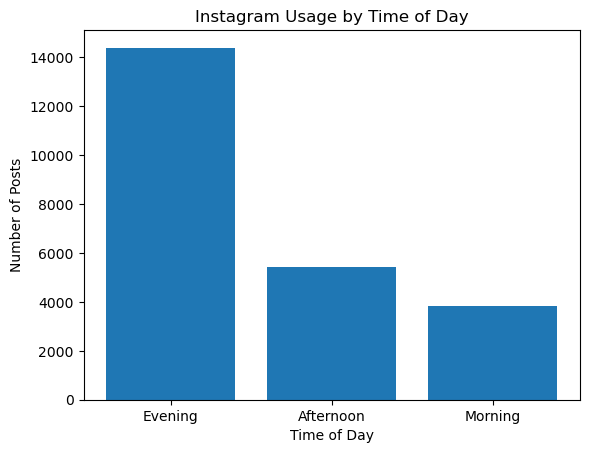

In [128]:
import matplotlib.pyplot as plt

plt.bar(usage_summary["time_of_day"], usage_summary["count"])
plt.title("Instagram Usage by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Posts")
plt.show()

Here this shows a percentage of my total useage for each time of day. 

In [129]:
total = usage_summary["count"].sum()

# The bar char was a good representation of my usage, but I wanted to see a percentage as well, so I am adding a percentage column
usage_summary["percentage"] = (usage_summary["count"] / total) * 100

print(usage_summary)


  time_of_day  count  percentage
0     Evening  14387   60.820123
1   Afternoon   5441   23.001480
2     Morning   3827   16.178398


Accourding to this data, I would say that my hypotheisis was correct, as 60% of my instagram usage is in the evening. 

Here is another chart showing the same data but with percentages of my usage to give a better visualization. 

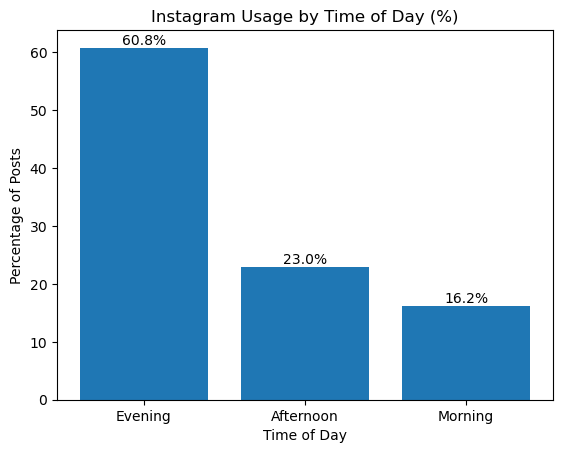

In [130]:
plt.bar(usage_summary["time_of_day"], usage_summary["percentage"])
plt.title("Instagram Usage by Time of Day (%)")
plt.xlabel("Time of Day")
plt.ylabel("Percentage of Posts")

# Show values on top of bars
for i, val in enumerate(usage_summary["percentage"]):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha="center")

plt.show()

### What does this Data Represent
This data is showing three things: </br>
-it is grouping my interactions by time of day, evening, afternoon, and morning. </br>
-it is showing the raw total of interactions on likes or posts. </br>
-it shows that total as a percentage.

### Does this meet Tidy Principles?
I would say it does meet tidy principles. Each variable has its own column, Time of Day, Count, and Percentage. And each observation (time of day) has its own row. Making a nice tidy summary table of my instagram usage. 

### Can This Data Test Your Hypothesis?
Yes, I would say it did test my hypothesis: "I scroll through Instagram and like posts more in the evening than during the rest of the day." </br>
-The data shows evening having the highest count compared to afternoon and morning. </br>
-Proving I do engage more with Instagram in the evening. </br>
-I also have quantitative evidence: about 61% of my usage is in the evening, and about 39% is shared between the rest of the day. 